In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Titanic veri setini yükleme
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)



1. Eksik Veriyi Giderme Yöntemleri

In [ ]:
# Eksik veri kontrolü
df.isna().sum()

In [ ]:
# 1. Silme: Age ve Cabin sütunlarında eksik veri olan satırları silme
df_dropped = df.dropna(subset=['Age', 'Cabin'])
df_dropped.shape



(185, 12)

In [ ]:
# 2. Sabit değerle doldurma: Cabin sütununu 'Bilinmiyor' ile doldurma
df['Cabin'] = df['Cabin'].fillna('Bilinmiyor')
df['Cabin'].isna().sum()



np.int64(0)

In [ ]:
df["Cabin"].value_counts().head(10)

Cabin
Bilinmiyor     687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
D                3
F33              3
E101             3
F2               3
B20              2
Name: count, dtype: int64

In [ ]:
# 3. Ortalama ile doldurma: Age sütununu ortalama yaşla doldurma
mean_age = df['Age'].mean()
df['Age_mean'] = df['Age'].fillna(mean_age)
df[['Age', 'Age_mean']].head()



,Age,Age_mean
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0


In [ ]:
# 4. Medyan ile doldurma: Age sütununu medyan ile doldurma
median_age = df['Age'].median()
df['Age_median'] = df['Age'].fillna(median_age)



In [ ]:
# 5. Grup bazlı doldurma: Pclass ve Sex bazında Age ortalaması ile doldurma
df['Age_group'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))
df[['Age', 'Age_group']].head()

,Age,Age_group
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0


In [ ]:
# İleri ve geri doldurma: Age sütununu ileri ve geri doldurma
df['Age_ffill'] = df['Age'].fillna(method='ffill')
df['Age_bfill'] = df['Age'].fillna(method='bfill')


# Eksik verileri kalıcı olarak doldurma yöntemleri
# Bu yöntemler, orijinal DataFrame üzerinde değişiklik yapar.


# 1. inplace=True ile kalıcı doldurma
df['Cabin'].fillna('Bilinmiyor', inplace=True)
df['Cabin'].isna().sum()  # Eksik veri kalmadı, orijinal df değişti

# 2. Atama ile kalıcı doldurma
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'].isna().sum()  # Eksik veri kalmadı, Age sütunu değişti

# 3. Grup bazlı doldurma (atama ile)
df['Age_group'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))
df[['Age', 'Age_group']].head()

/tmp/ipython-input-13-1346569703.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age_ffill'] = df['Age'].fillna(method='ffill')
/tmp/ipython-input-13-1346569703.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age_bfill'] = df['Age'].fillna(method='bfill')
/tmp/ipython-input-13-1346569703.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


,Age,Age_group
0,22.000000,22.000000
1,38.000000,38.000000
2,26.000000,26.000000
3,35.000000,35.000000
4,35.000000,35.000000
...,...,...
95,29.699118,29.699118
96,71.000000,71.000000
97,23.000000,23.000000
98,34.000000,34.000000


KORELASYON

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr


# Sayısal değişkenler için Pearson korelasyonu
corr_matrix = df[['Age', 'Fare', 'Pclass', 'Survived']].corr(method='pearson')
corr_matrix



,Age,Fare,Pclass,Survived
Age,1.000000,0.091566,-0.331339,-0.069809
Fare,0.091566,1.000000,-0.549500,0.257307
Pclass,-0.331339,-0.549500,1.000000,-0.338481
Survived,-0.069809,0.257307,-0.338481,1.000000


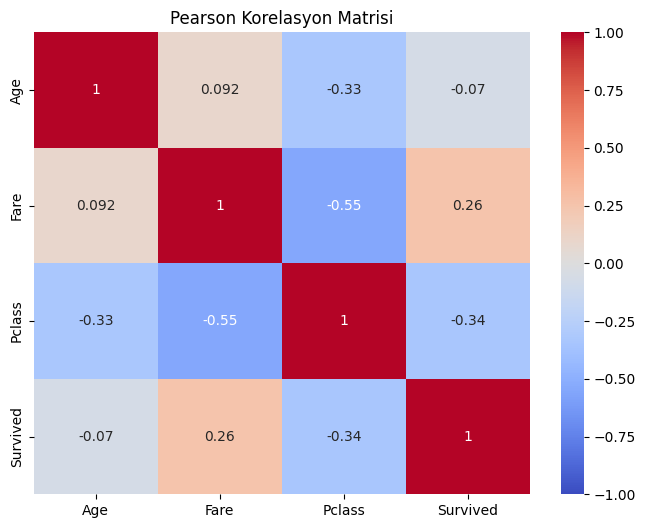

In [ ]:
# Korelasyon matrisini görselleştirme
plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=None)

plt.title('Pearson Korelasyon Matrisi')

plt.show()



In [ ]:
# Kategorik-kategorik: Pclass ve Survived
crosstab = pd.crosstab(df['Pclass'], df['Survived'])
crosstab

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


2. Aykırı Değer (Outlier) Tespiti

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

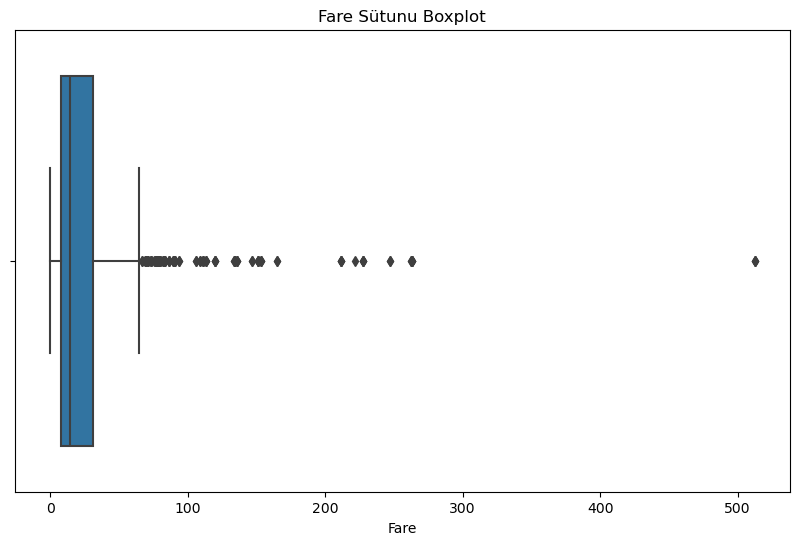

In [ ]:
# 1. Boxplot ile görselleştirme
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fare'])
plt.title('Fare Sütunu Boxplot')
plt.show()

65.6344


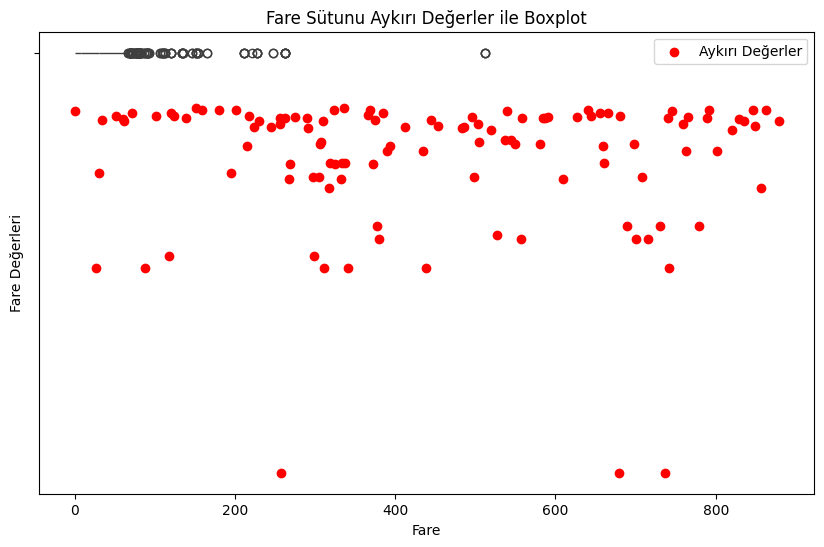

In [ ]:
# 2. IQR yöntemi ile aykırı değer tespiti
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
len(outliers_iqr)

# Görselleştirme
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fare'])
plt.scatter(outliers_iqr.index, outliers_iqr['Fare'], color='red', label='Aykırı Değerler')
plt.legend()
plt.xlabel('Fare')
plt.ylabel('Fare Değerleri')
plt.title('Fare Sütunu Aykırı Değerler ile Boxplot')
plt.show()

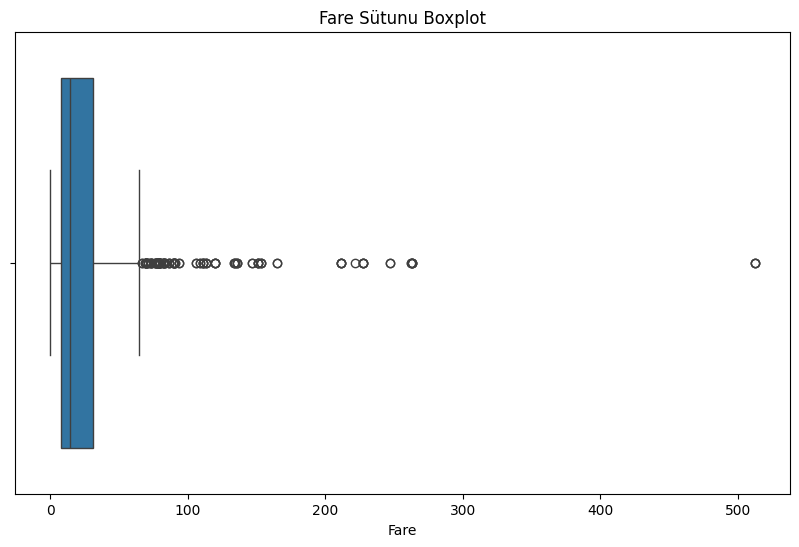

In [ ]:
# Fare sütunu boxplot görselleştirme
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fare'])
plt.title('Fare Sütunu Boxplot')
plt.xlabel('Fare')
plt.show()


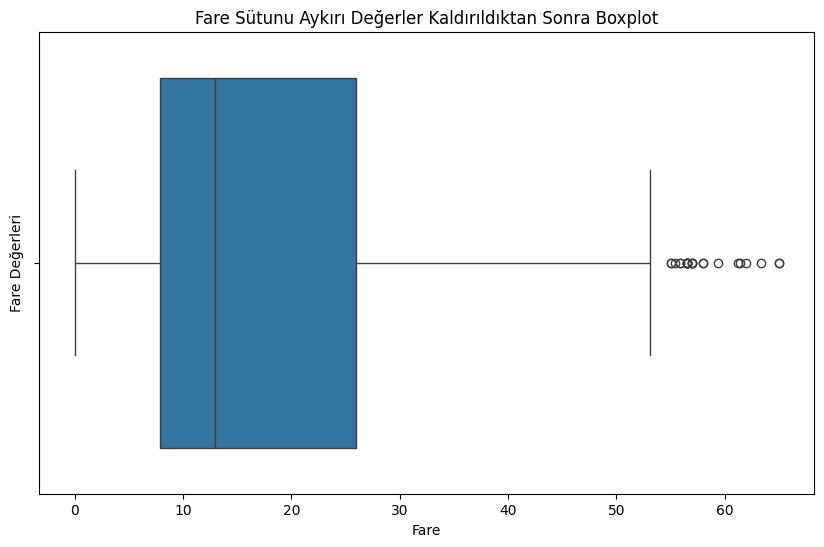

In [ ]:
#iqr ile tespit edilen aykırı değerleri kaldırma
df_no_outliers = df[~((df['Fare'] < lower_bound) | (df['Fare'] > upper_bound))]
df_no_outliers.shape

# Görselleştirme: Aykırı değerlerin kaldırılmasından sonra Fare sütununun boxplot'u
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['Fare'])
plt.title('Fare Sütunu Aykırı Değerler Kaldırıldıktan Sonra Boxplot')
plt.xlabel('Fare')
plt.ylabel('Fare Değerleri')
plt.show()

In [ ]:
# 3. Z-Score ile aykırı değer tespiti
df['Z_Score_Fare'] = (df['Fare'] - df['Fare'].mean()) / df['Fare'].std()
outliers_zscore = df[np.abs(df['Z_Score_Fare']) > 3]
len(outliers_zscore)

20

In [ ]:
# 4. Aykırı değerleri sınırlandırma (capping)
df['Fare_capped'] = df['Fare'].clip(lower=lower_bound, upper=upper_bound)
df[['Fare', 'Fare_capped']].describe()

,Fare,Fare_capped
count,891.000000,891.000000
mean,32.204208,24.046813
std,49.693429,20.481625
min,0.000000,0.000000
25%,7.910400,7.910400
50%,14.454200,14.454200
75%,31.000000,31.000000
max,512.329200,65.634400


3. Tip Dönüşümleri

In [ ]:
# 1. astype() ile tip dönüşümü
df['Age'] = df['Age'].astype('float64')
df['Age'].dtype

dtype('float64')

In [ ]:
# 2. to_numeric ile dönüşüm
df['Age_str'] = df['Age'].astype(str)
df['Age_numeric'] = pd.to_numeric(df['Age_str'], errors='coerce')
df[['Age_str', 'Age_numeric']].head()

,Age_str,Age_numeric
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0


In [ ]:
# 3. Kategorik → Sayısal dönüşüm
df['Sex_numeric'] = df['Sex'].map({'male': 0, 'female': 1})
df[['Sex', 'Sex_numeric']].head()

,Sex,Sex_numeric
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


3.2. Tarih Verileri ile Çalışma

In [ ]:
# Örnek bir tarih veri seti oluşturma
date_df = pd.DataFrame({
    'date': ['2023-01-01', '2023-02-15', '2023-03-30']
})

In [ ]:
# 1. to_datetime ile dönüşüm
date_df['date'] = pd.to_datetime(date_df['date'], format='%Y-%m-%d')
date_df['date'].dtype

dtype('<M8[ns]')

In [ ]:
# 2. .dt ile bileşen çekme
date_df['year'] = date_df['date'].dt.year
date_df['month'] = date_df['date'].dt.month
date_df['day'] = date_df['date'].dt.day
date_df

,date,year,month,day
0,2023-01-01,2023,1,1
1,2023-02-15,2023,2,15
2,2023-03-30,2023,3,30


In [ ]:
# 3. Zaman farkı hesaplama
date_df['days_since'] = (pd.to_datetime('2023-12-31') - date_df['date']).dt.days
date_df[['date', 'days_since']]

,date,days_since
0,2023-01-01,364
1,2023-02-15,319
2,2023-03-30,276


In [ ]:
# 4. Tarih sıralama
date_df = date_df.sort_values('date')
date_df

,date,year,month,day,days_since
0,2023-01-01,2023,1,1,364
1,2023-02-15,2023,2,15,319
2,2023-03-30,2023,3,30,276


4. Veriyi Anlamak: Dağılım, Çarpıklık, Basıklık, Özet İstatistikler

In [ ]:
# Özet istatistikler
df['Age'].describe()



count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
# Mod hesaplama
df['Age'].mode()[0]



24.0

In [ ]:
# Varyans
df['Age'].var()

211.0191247463081

4.2. Dağılım Analizi

c:\Users\asus\anaconda3\envs\miuul1env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


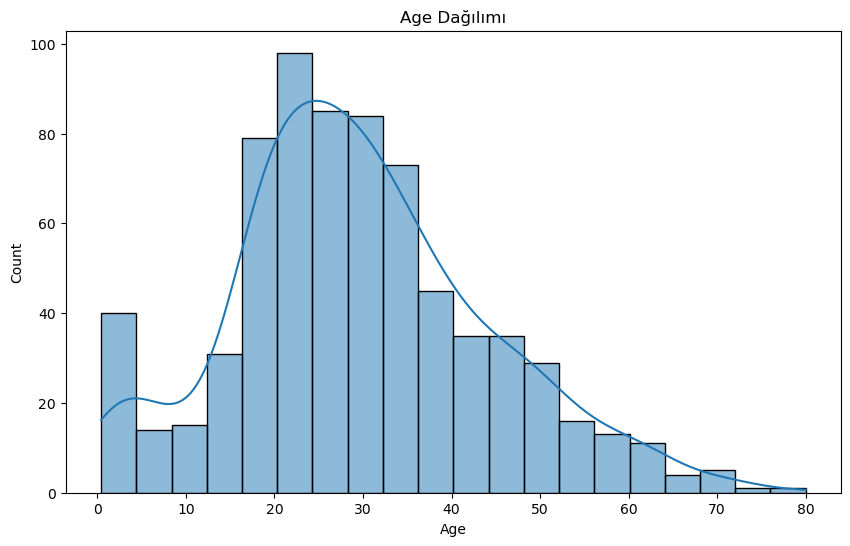

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Dağılımı')
plt.show()

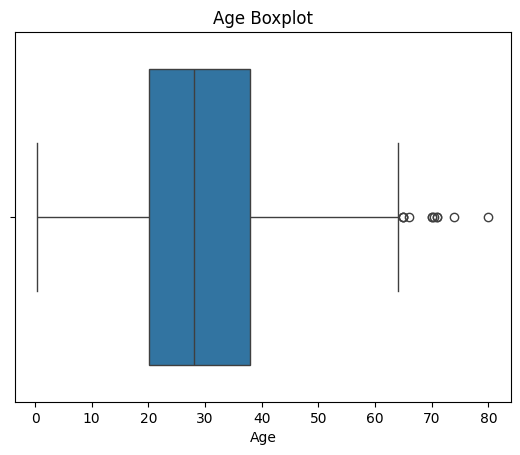

In [ ]:
sns.boxplot(x=df['Age'])
plt.title('Age Boxplot')
plt.show()



4.3. Çarpıklık ve Basıklık

In [ ]:
df['Age'].skew() # Çarpıklık


np.float64(0.38910778230082704)

In [ ]:
df['Age'].kurt() # Basıklık

0.17827415364210353

4.4. Sayısal Değişkenler için Dağılım Raporu

In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
report = pd.DataFrame({
    'Mean': df[num_cols].mean(),
    'Median': df[num_cols].median(),
    'Std': df[num_cols].std(),
    'Skew': df[num_cols].skew(),
    'Kurtosis': df[num_cols].kurt()
})
report

,Mean,Median,Std,Skew,Kurtosis
PassengerId,4.460000e+02,446.000000,257.353842,0.000000,-1.200000
Survived,3.838384e-01,0.000000,0.486592,0.478523,-1.775005
Pclass,2.308642e+00,3.000000,0.836071,-0.630548,-1.280015
Age,2.969912e+01,28.000000,14.526497,0.389108,0.178274
SibSp,5.230079e-01,0.000000,1.102743,3.695352,17.880420
Parch,3.815937e-01,0.000000,0.806057,2.749117,9.778125
Fare,3.220421e+01,14.454200,49.693429,4.787317,33.398141
Age_mean,2.969912e+01,29.699118,13.002015,0.434488,0.966279
Age_median,2.936158e+01,28.000000,13.019697,0.510245,0.993871
Age_group,2.931864e+01,26.507589,13.281103,0.498421,0.715225


5. Kategorik Veri Analizi ve Etiketleme

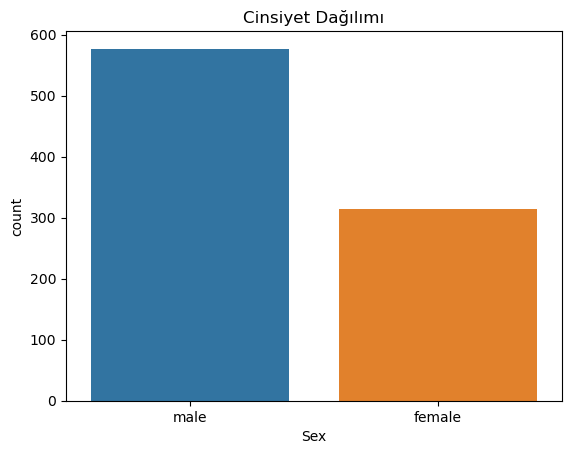

In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df[col].value_counts(normalize=True)

sns.countplot(x='Sex', data=df)
plt.title('Cinsiyet Dağılımı')
plt.show()

5.2. Kategorik Verileri Temizleme

In [ ]:
# Büyük-küçük harf standardizasyonu
df['Sex'] = df['Sex'].str.lower()

# Nadir sınıfları birleştirme
threshold = 0.01
value_counts = df['Embarked'].value_counts(normalize=True)
rare_values = value_counts[value_counts < threshold].index
df['Embarked_cleaned'] = df['Embarked'].replace(rare_values, 'Other')
df['Embarked_cleaned'].value_counts()

Embarked_cleaned
S    644
C    168
Q     77
Name: count, dtype: int64

5.3. Label Encoding & One-Hot Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])
df[['Sex', 'Sex_encoded']].head()



,Sex,Sex_encoded
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


In [ ]:
# One-Hot Encoding
df_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)
df = pd.concat([df, df_dummies], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_group,Z_Score_Fare,Fare_capped,Age_str,Age_numeric,Sex_numeric,Embarked_cleaned,Sex_encoded,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,22.0,-0.502163,7.2500,22.0,22.0,0,S,1,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,38.0,0.786404,65.6344,38.0,38.0,1,C,0,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,26.0,-0.488580,7.9250,26.0,26.0,1,S,0,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,35.0,0.420494,53.1000,35.0,35.0,1,S,0,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,35.0,-0.486064,8.0500,35.0,35.0,0,S,1,False,True


6. Ek Fonksiyonlar: lambda, zip, map

In [ ]:
# 1. lambda: Fare sütununu 10% artır
df['Fare_increased'] = df['Fare'].apply(lambda x: x * 1.1)
df[['Fare', 'Fare_increased']].head()



,Fare,Fare_increased
0,7.2500,7.97500
1,71.2833,78.41163
2,7.9250,8.71750
3,53.1000,58.41000
4,8.0500,8.85500


In [ ]:
# 2. zip: Basit örnekle isim ve yaş birleştirme
names = ['Ali', 'Ayşe']
ages = [20, 25]
name_age_pairs = list(zip(names, ages))
pd.Series(name_age_pairs)



0     (Ali, 20)
1    (Ayşe, 25)
dtype: object

In [ ]:
# Titanic ile zip: Pclass ve Sex
class_sex = list(zip(df['Pclass'], df['Sex']))
df['Class_Sex'] = pd.Series([f"{p}_{s}" for p, s in class_sex])
df[['Pclass', 'Sex', 'Class_Sex']].head()



,Pclass,Sex,Class_Sex
0,3,male,3_male
1,1,female,1_female
2,3,female,3_female
3,1,female,1_female
4,3,male,3_male


In [ ]:
# 3. map: Survived etiketleme
df['Survived_label'] = df['Survived'].map({0: 'No', 1: 'Yes'})
df[['Survived', 'Survived_label']].head()

,Survived,Survived_label
0,0,No
1,1,Yes
2,1,Yes
3,1,Yes
4,0,No


7. String İşlemleri

In [ ]:
# 1. apply(str.lower): Sex küçük harfe
df['Sex_lower'] = df['Sex'].apply(str.lower)
df[['Sex', 'Sex_lower']].head()



,Sex,Sex_lower
0,male,male
1,female,female
2,female,female
3,female,female
4,male,male


In [ ]:
# 2. str.strip(): Name boşluk temizleme
df['Name_cleaned'] = df['Name'].str.strip()
df[['Name', 'Name_cleaned']].head()



,Name,Name_cleaned
0,"Braund, Mr. Owen Harris","Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...","Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina","Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)","Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry","Allen, Mr. William Henry"


In [ ]:
# 3. str.contains(): Name’de 'Mr.'
df['Is_Mr'] = df['Name'].str.contains('Mr.', na=False)
df[['Name', 'Is_Mr']].head()



,Name,Is_Mr
0,"Braund, Mr. Owen Harris",True
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True
2,"Heikkinen, Miss. Laina",False
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",True
4,"Allen, Mr. William Henry",True


In [ ]:
# 4. str.replace(): Cabin’de değiştirme
df['Cabin_replaced'] = df['Cabin'].str.replace('Bilinmiyor', 'Unknown')
df[['Cabin', 'Cabin_replaced']].head()

,Cabin,Cabin_replaced
0,Bilinmiyor,Unknown
1,C85,C85
2,Bilinmiyor,Unknown
3,C123,C123
4,Bilinmiyor,Unknown


8. Object Tipinde Sayısal Verilerin Dönüşümü

In [ ]:
# Object sütunu oluşturma
df['Age_str'] = df['Age'].astype(str).replace(np.nan, 'not_a_number')



In [ ]:
# 1. str.isdigit() kontrolü
df['Is_Digit'] = df['Age_str'].str.isdigit()
df[['Age_str', 'Is_Digit']].head()



,Age_str,Is_Digit
0,22.0,False
1,38.0,False
2,26.0,False
3,35.0,False
4,35.0,False


In [ ]:
# 2. Geçerli sayılar için dönüşüm
df['Age_int'] = pd.to_numeric(df['Age_str'], errors='coerce')
df[['Age_str', 'Age_int']].head()

,Age_str,Age_int
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0


9. Standardizasyon Yöntemleri

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 1. Log dönüşüm
df['Fare_log'] = np.log1p(df['Fare'])
df[['Fare', 'Fare_log']].head()



,Fare,Fare_log
0,7.2500,2.110213
1,71.2833,4.280593
2,7.9250,2.188856
3,53.1000,3.990834
4,8.0500,2.202765


In [ ]:
# 2. Min-Max ölçekleme
minmax_scaler = MinMaxScaler()
df['Fare_minmax'] = minmax_scaler.fit_transform(df[['Fare']])
df[['Fare', 'Fare_minmax']].head()



,Fare,Fare_minmax
0,7.2500,0.014151
1,71.2833,0.139136
2,7.9250,0.015469
3,53.1000,0.103644
4,8.0500,0.015713


In [ ]:
# 3. Standart ölçekleme
std_scaler = StandardScaler()
df['Fare_std'] = std_scaler.fit_transform(df[['Fare']])
df[['Fare', 'Fare_std']].head()

,Fare,Fare_std
0,7.2500,-0.502445
1,71.2833,0.786845
2,7.9250,-0.488854
3,53.1000,0.420730
4,8.0500,-0.486337
